In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('./data/2017Q4.csv')
df.shape

(59324, 55)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59324 entries, 0 to 59323
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              59324 non-null  int64  
 1   funded_amnt                     59324 non-null  int64  
 2   term                            59324 non-null  object 
 3   int_rate                        59324 non-null  object 
 4   installment                     59324 non-null  float64
 5   emp_title                       54381 non-null  object 
 6   emp_length                      54456 non-null  object 
 7   home_ownership                  59324 non-null  object 
 8   annual_inc                      59324 non-null  float64
 9   loan_status                     59324 non-null  object 
 10  purpose                         59324 non-null  object 
 11  zip_code                        59324 non-null  object 
 12  addr_state                      

In [24]:
df.head()

,id,funded_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit,revol_bal_joint,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths
0,119702702,6000,36 months,7.97%,187.94,Panel operator,< 1 year,MORTGAGE,30000.0,Current,...,1,100.0,0.0,1,18032,11400,28868.0,674.0,Oct-09,1.0
1,122369339,10000,60 months,12.62%,225.60,MACHINIST,5 years,MORTGAGE,47300.0,In Grace Period,...,3,97.4,14.3,0,8184,31600,NaN,NaN,NaN,NaN
2,124136825,1500,36 months,6.72%,46.13,Sales rep,9 years,MORTGAGE,30975.0,Current,...,0,100.0,0.0,0,537,1800,NaN,NaN,NaN,NaN
3,124065154,8400,36 months,9.93%,270.77,NaN,NaN,RENT,18000.0,Fully Paid,...,0,100.0,25.0,0,10176,12100,NaN,NaN,NaN,NaN
4,119971787,24000,36 months,12.62%,804.27,Owner,< 1 year,RENT,20000.0,Current,...,2,100.0,0.0,0,690,10300,8372.0,669.0,Aug-05,2.0


# Summary Stats
Starting with 55 features
59324 entries

1. Term of Loan and Loan Amount relationship
2. Frequency Distribution of Loan Amount. Majority(mode) are 10k.
3. Frequency Distribution of Interest Rates. Majority(mode) are 13%
4. Loan Amounts for each Loan Status shows our class size and immediatly we can see an imbalanced dataset
5. Loan Amount for each loan purpose (application type). The Majority are debt_consolidation. The purpose is hidden since it is a loan for a loan. The highest purpose category then is credit_card loan.
6. The employment length and interest rate box plot shows that across all variances of employment length the interest rate ranges are the same.
7. Employment Length and Number of Loans
8. Taking a closer look at the number of defaults per state. This doesn't really matter unless you want to factor in the state where a loan was issued. This can lead to ethical bias per location. Also, with covid's impact on remote work, we can't predict this super well.
9. 


In [25]:
df.groupby(["addr_state"])["funded_amnt"].mean().sort_values(ascending = False).head(15)



addr_state
DC    18185.655738
WY    16810.401460
UT    16286.081794
VA    16219.129555
DE    16081.601124
WV    16040.725806
TX    16005.221958
HI    15998.920863
NJ    15995.502583
CA    15956.373640
IL    15855.983247
LA    15751.248050
AK    15684.016393
MA    15622.222222
GA    15602.205882
Name: funded_amnt, dtype: float64

In [26]:
df.groupby(["addr_state"])["annual_inc"].mean().sort_values(ascending = False).head(15)

addr_state
DC    105711.442623
CT     92394.837861
MD     89511.913436
NJ     88096.962804
CA     86439.987433
VA     85951.119528
WV     85189.973118
MA     84132.500731
TX     84073.833310
MS     81982.671684
HI     81653.775360
NY     80512.331576
IL     80040.366254
CO     79675.709064
NH     79498.693878
Name: annual_inc, dtype: float64

/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition- Loan Amount')

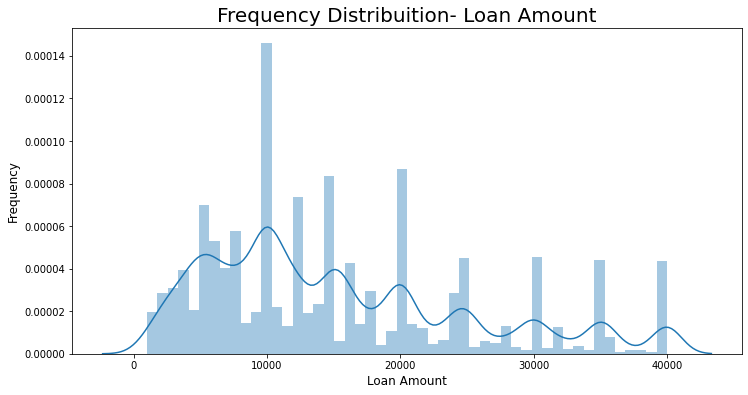

In [27]:
# Frequency distribution of Loan Amount
plt.figure(figsize=(12,6))
g = sns.distplot(df["funded_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)

/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Int Rate Distribuition')

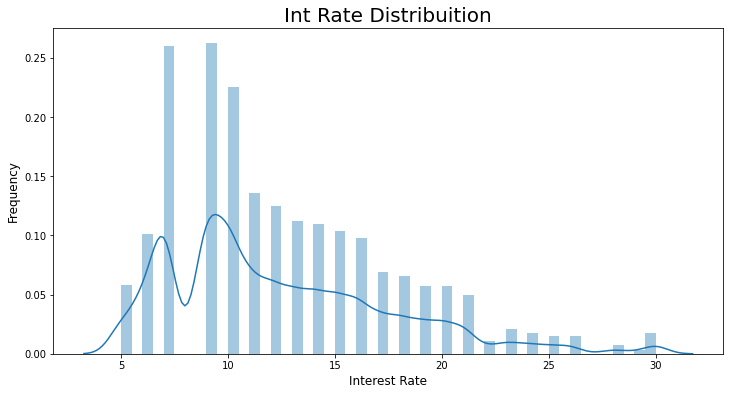

In [28]:
# Converting int_rate to numerical columns
df.int_rate = df.int_rate.apply(lambda x:x[:2])
df.int_rate = df.int_rate.astype('float')
# Frequency distribution of Interest Rate
plt.figure(figsize=(12,6))
g = sns.distplot(df["int_rate"])
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Int Rate Distribuition", fontsize=20)

Text(0, 0.5, 'Loan Amount')

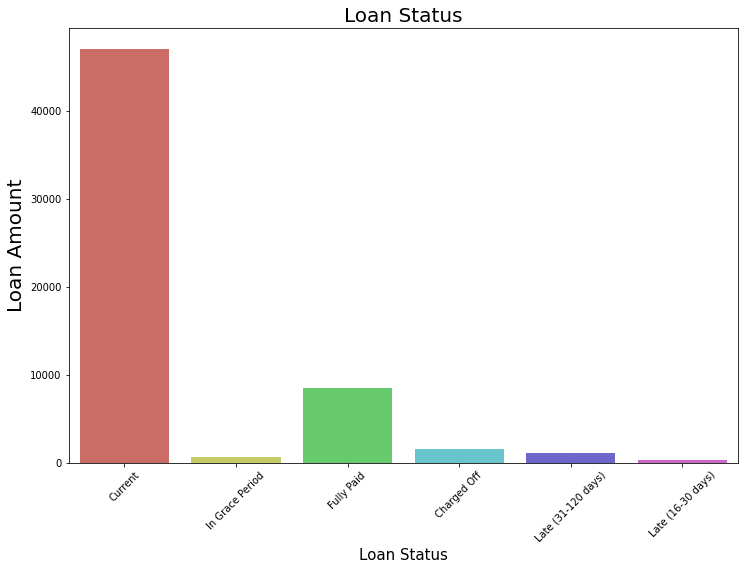

In [29]:
# Target Varaiable - Loan Status
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

In [30]:
df["loan_status"].value_counts()

Current               47091
Fully Paid             8561
Charged Off            1539
Late (31-120 days)     1180
In Grace Period         629
Late (16-30 days)       324
Name: loan_status, dtype: int64

In [31]:
df.groupby('loan_status')['funded_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1539.0,16458.219623,10200.661441,1000.0,8162.5,15000.0,23725.0,40000.0
Current,47091.0,15457.766877,9964.581197,1000.0,8000.0,12600.0,20000.0,40000.0
Fully Paid,8561.0,13903.734961,9765.050688,1000.0,6000.0,11000.0,20000.0,40000.0
In Grace Period,629.0,17098.966614,10123.777396,1000.0,10000.0,15000.0,24000.0,40000.0
Late (16-30 days),324.0,17361.111111,10263.990301,1500.0,9600.0,15000.0,25000.0,40000.0
Late (31-120 days),1180.0,17190.084746,10332.321946,1000.0,9762.5,15000.0,24000.0,40000.0


<AxesSubplot:xlabel='installment', ylabel='funded_amnt'>

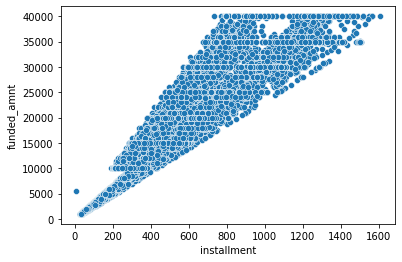

In [32]:
sns.scatterplot(x='installment',y='funded_amnt',data=df)

Text(0, 0.5, 'Loan Amount')

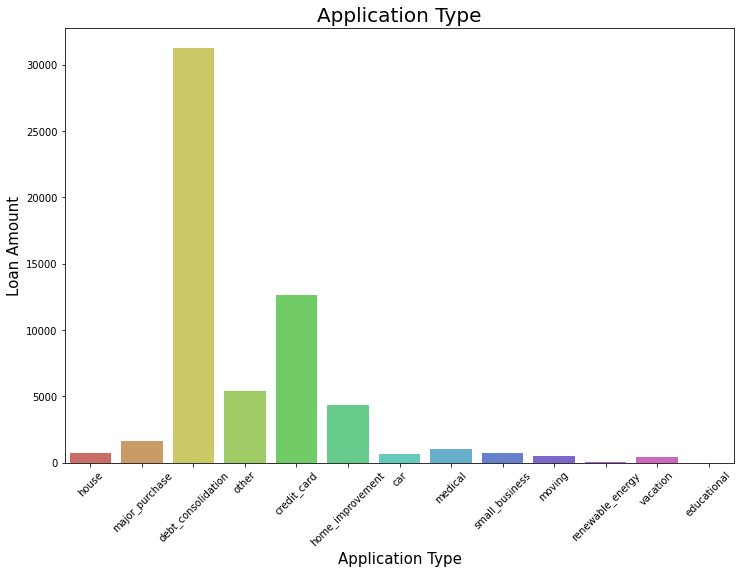

In [33]:
# Application Type and Loan Amount
plt.figure(figsize = (12,8))
g = sns.countplot(x="purpose",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type", fontsize=20)
g.set_xlabel("Application Type", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Loan Amount')

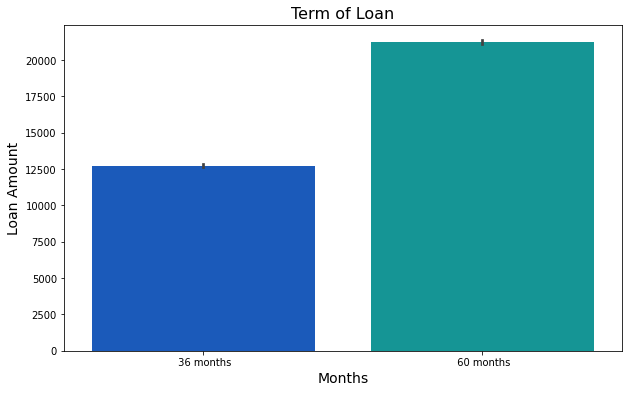

In [34]:
# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(10,6))
sns.barplot("term", "funded_amnt", data=df, palette='winter')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

Loan Amount Distribution BoxPlot


<AxesSubplot:xlabel='term', ylabel='funded_amnt'>

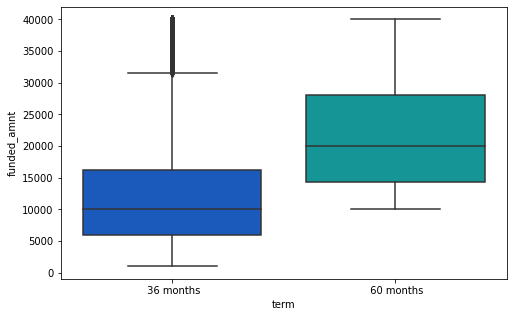

In [35]:
# Boxplot of Term and Loan Amount
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(8,5))
sns.boxplot(x=df.term, y=df.funded_amnt, palette='winter' )

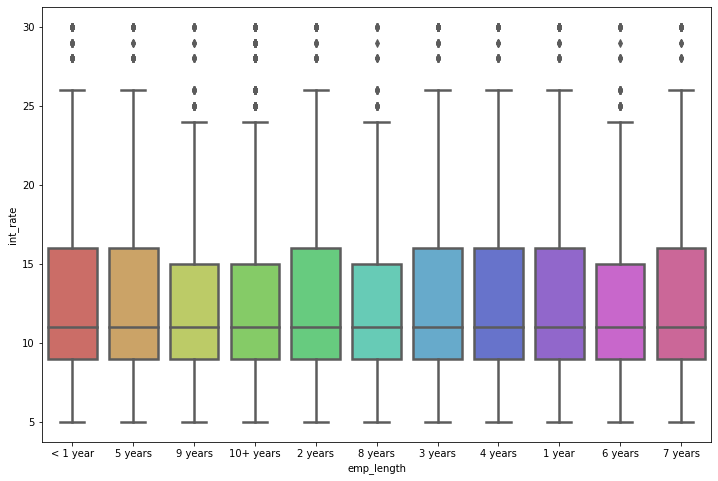

In [36]:
# Boxplot of Employment Length and Inter
plt.figure(figsize = (12,8))
ax = sns.boxplot(x="emp_length" ,y= "int_rate", data=df, linewidth=2.5, palette='hls')

plt.show()

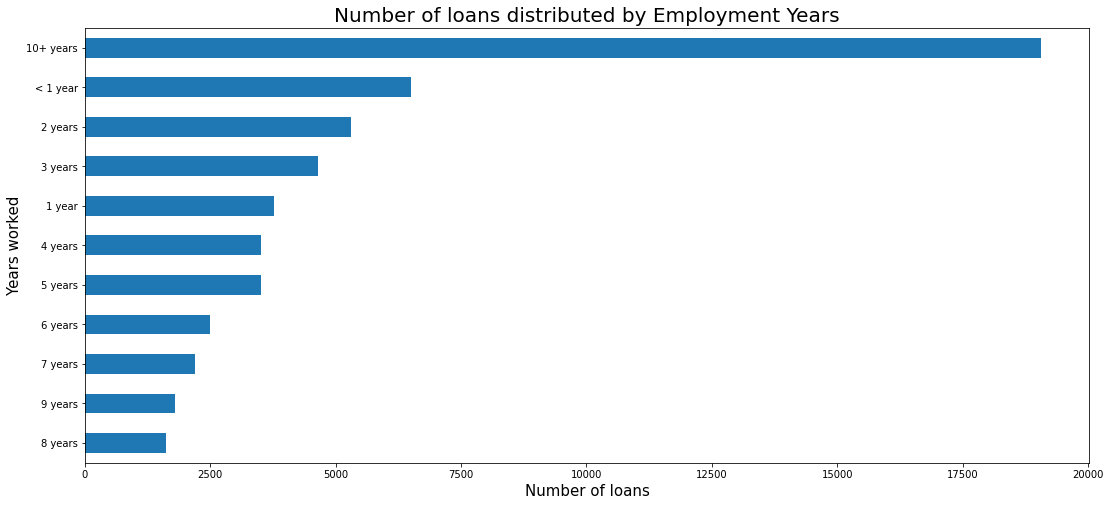

In [37]:
# Employment Length and Number of Loans
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

<AxesSubplot:xlabel='emp_length', ylabel='count'>

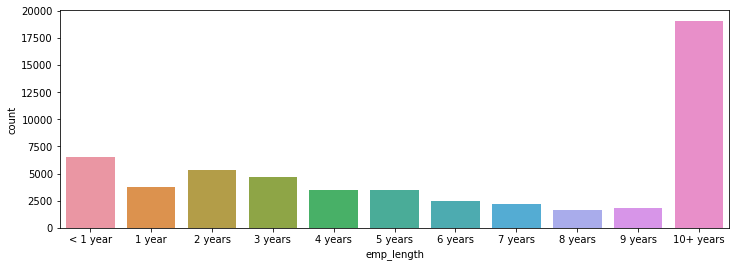

In [38]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)                   

<AxesSubplot:xlabel='emp_length', ylabel='count'>

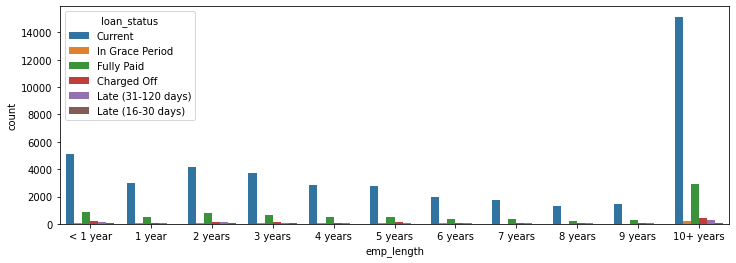

In [39]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')